In [183]:
# Import List
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import numpy as np

import pandas as pd


# 实验2

## 标准BP算法

首先需要对数据进行归一化处理，便于神经网络的使用。

In [184]:
# 读取所有数据（不包括第一行参数）
wine_data = np.genfromtxt('wine_data.csv', delimiter=',', skip_header=1)

# 读取所有特征数据，排除最后一列（列标签）
X = wine_data[:, 0:13]
# 标签列读取
y = wine_data[:, 13]

# 划分70%训练集，30%测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
# 数据标准化
label_train = LabelBinarizer().fit_transform(y_train)

设置神经网络参数。包括学习率、迭代次数、神经节点设置。

In [185]:
# 学习率
rate = 0.11
# 迭代次数
step = 10000

# 随机设置神经权值，13输入，3输出中间隐藏层100个神经元
v = np.random.random((13, 100)) * 2 - 1  # 输入层->隐层
w = np.random.random((100, 3)) * 2 - 1  # 隐层->输出层

激活函数$sigmoid()$与其导数函数如下。

In [186]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def de_sigmoid(x):
    return x * (1 - x)

创建训练函数
标准BP算法核心要点如下：

1. 随机初始化节点的权值。
2. 按照激活函数公式计算出样本误差。
3. 根据样本误差反推出权值梯度项。
4. 更新节点权值。

反复执行上述过程，直到达到设定的训练次数。

In [187]:
def standard_bp_train(train_x, train_y, train_rate, train_step):
    # 导入神经节点
    global v, w
    for n in range(train_step + 1):
        # 随机选择样本
        i = np.random.randint(train_x.shape[0])
        x = train_x[i]
        x = np.atleast_2d(x)

        # 节点激活
        L1 = sigmoid(np.dot(x, v))  # 输入层->隐层
        L2 = sigmoid(np.dot(L1, w))  # 隐层->输出层

        # 误差反向反馈
        L2_delta = (train_y[i] - L2) * de_sigmoid(L2)  # 输出层->隐层
        L1_delta = L2_delta.dot(w.T) * de_sigmoid(L1)  # 隐层->输入层

        # 权值更新
        w = w + train_rate * L1.T.dot(L2_delta)  # 隐层->输出层
        v = v + train_rate * x.T.dot(L1_delta)  # 输入层->隐层

        # 每1000次训练对网络进行测试，输出测试准确率
        if n % 1000 == 0:
            output = predict(x_test)
            predictions = np.argmax(output, axis=1)  # 选择概率最大的输出点作为结果，输出所在列编号，对应分类结果
            acc = np.mean(np.equal(predictions, y_test))  # 对比测试样本，求准确率
            print("step:", n, "acc:", acc)


def predict(x):
    L1 = sigmoid(np.dot(x, v))
    L2 = sigmoid(np.dot(L1, w))
    return L2


standard_bp_train(x_train, label_train, rate, step)

/home/orekimai/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


step: 0 acc: 0.35185185185185186
step: 1000 acc: 0.3888888888888889
step: 2000 acc: 0.25925925925925924
step: 3000 acc: 0.3888888888888889
step: 4000 acc: 0.25925925925925924
step: 5000 acc: 0.25925925925925924
step: 6000 acc: 0.3888888888888889
step: 7000 acc: 0.3888888888888889
step: 8000 acc: 0.25925925925925924
step: 9000 acc: 0.25925925925925924
step: 10000 acc: 0.35185185185185186


通过运行标准BP算法可以发现，单层神经网络中神经点之间的权重在每次放入样本训练后都会发生改变，改变次数与训练次数相关，即：标准BP算法更新规则是基于每次样本而去修改。

## 累计BP算法
累计BP算法

In [188]:
def sum_bp_train(train_x, train_y, train_rate, train_step):
    return



## 构建神经网络

使用TensorFlow搭建神经网络。

In [189]:
# Import List
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers, optimizers
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from matplotlib import pyplot as plt

导入数据，并划分训练集与测试集。

In [190]:
# 读取所有数据（不包括第一行参数）
wine_data_tf = np.genfromtxt('wine_data.csv', delimiter=',', skip_header=1)
# 读取所有特征数据，排除最后一列（列标签）
X_tf = wine_data_tf[:, 0:13]
# 标签列读取
y_tf = wine_data_tf[:, 13]

# 数据归一化
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_tf)
print(X_scaler)

# 划分训练集测试集
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(X_scaler, y_tf, stratify=y, random_state=42, test_size=0.2)
# 数据标准化
label_train_tf = LabelBinarizer().fit_transform(y_train_tf)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


创建TensorFlow神经网络，设置输入层、隐藏层和输出层的大小。

In [191]:
# 使用keras的层堆叠创建神经网络，包含输入层、隐层和输出层
model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[13]),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(3)
])

# 参数设置
LEARNING_RATE = 0.001  # 学习率
EPOCHS = 50  # 训练轮数
BATCH_SIZE = 32  # 每轮训练进入的数据量

# 通过compile调整网络学习参数
model.compile(
    # 优化器
    optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
    # 损失函数
    loss='mse',
    # 评估函数
    metrics=['mae'])

向模型输入数据进行训练

In [192]:
history_1 = model.fit(x_train_tf, y_train_tf,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(x_test_tf, y_test_tf),
          validation_freq=1)

model.summary()

Epoch 1/50
5/5 [==============================] - 1s 91ms/step - loss: 1.7764 - mae: 1.0679 - val_loss: 1.6223 - val_mae: 1.0290
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 1.6307 - mae: 1.0325 - val_loss: 1.4616 - val_mae: 0.9644
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 1.3768 - mae: 0.9420 - val_loss: 1.3135 - val_mae: 0.9052
Epoch 4/50
5/5 [==============================] - 0s 23ms/step - loss: 1.1447 - mae: 0.8399 - val_loss: 1.1470 - val_mae: 0.8409
Epoch 5/50
5/5 [==============================] - 0s 23ms/step - loss: 0.9984 - mae: 0.7827 - val_loss: 0.9863 - val_mae: 0.7760
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 0.8995 - mae: 0.7531 - val_loss: 0.8289 - val_mae: 0.7070
Epoch 7/50
5/5 [==============================] - 0s 22ms/step - loss: 0.8329 - mae: 0.7294 - val_loss: 0.6804 - val_mae: 0.6350
Epoch 8/50
5/5 [==============================] - 0s 23ms/step - loss: 0.6028 - mae: 0.6145 - val

结果可视化，输出每轮训练后均方误差、损失函数随次数变化后的曲线。

In [193]:
def plot_results(history):
    '''
    history: 模型训练后返回的训练结果
    '''
    # 显示MAE
    plt.figure(figsize=(10, 10))
    epoch_range = range(1, EPOCHS + 1)  # 横轴范围
    plt.plot(epoch_range, history.history['mae'], label = 'train_mae')
    plt.plot(epoch_range, history.history['val_mae'], label = 'val_mae')
    plt.title("MAE")
    plt.xlabel("Epoch")
    plt.ylabel("mae")
    plt.legend(loc = 'best')
    plt.show()

    # 显示LOSS
    plt.figure(figsize=(10, 10))
    plt.plot(epoch_range, history.history['loss'], label = 'train_loss')
    plt.plot(epoch_range, history.history['val_loss'], label = 'val_moss')
    plt.title("LOSS")
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.legend(loc = 'best')
    plt.show()


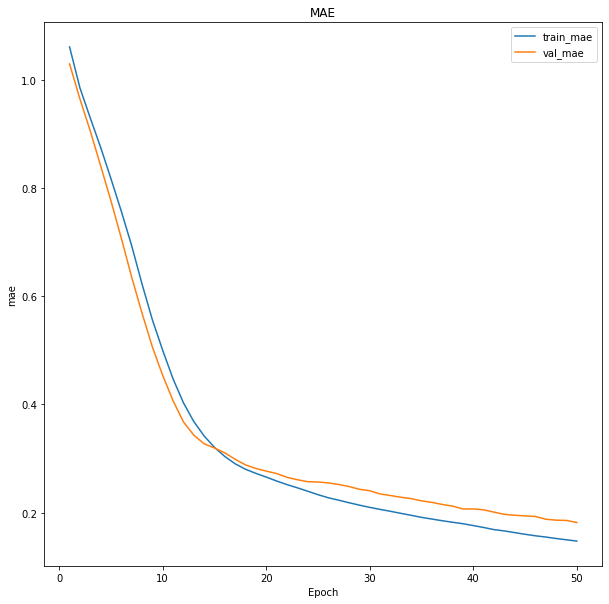

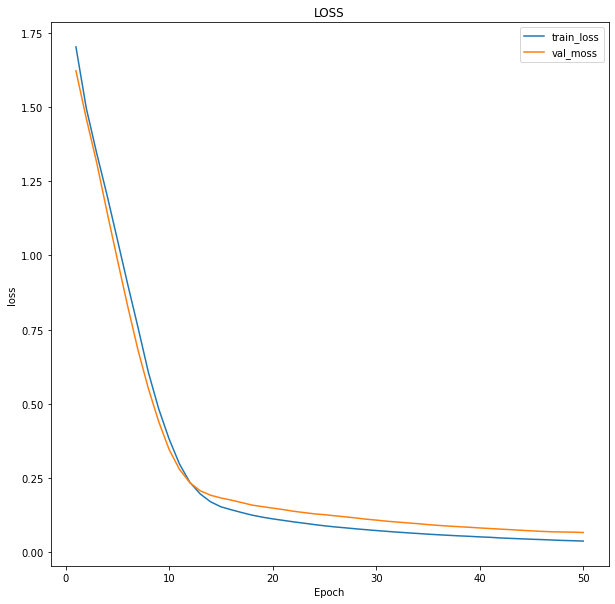

In [194]:
plot_results(history_1)

对模型进行验证

In [195]:
def model_evaluation(model):
    eval_loss, eval_mae = model.evaluate(x_test_tf, y_test_tf, batch_size = BATCH_SIZE, verbose = 1)
    print("验证损失：", eval_loss)
    print("验证mae", eval_mae)

model_evaluation(model)

2/2 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.1819
验证损失： 0.06623736023902893
验证mae 0.1818578541278839


输出模型的混淆函数，准确率

F1_Score:  0.3895424836601307


/home/orekimai/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


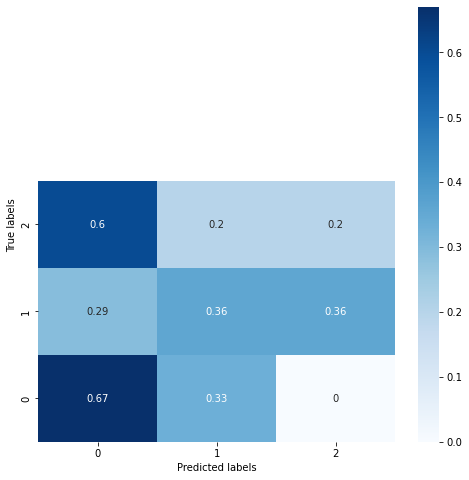

In [196]:
y_pred = model.predict_classes(x_test_tf)
print("F1_Score: ", f1_score(y_test_tf, y_pred, average="macro"))
con_mat = confusion_matrix(y_test_tf, y_pred)
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]  # 归一化
con_mat_norm = np.around(con_mat_norm, decimals=2)

# === plot ===
plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()